In [1]:
from datetime import datetime, timedelta
import time
from collections import namedtuple
import pandas as pd
import requests
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import numpy as np
import seaborn as sns
import sklearn.datasets as skd
import sklearn.ensemble as ske

In [2]:
#df = pd.ExcelFile('data.xlsx')
#df.sheet_names

In [3]:
Ames = pd.read_excel('data.xlsx', sheet_name="Ames")
Ames.index
Ames.head()

,days,tmpf,relh,feel,sped,p01i,vsby
0,0.036806,34.0,81.37,26.00,10.35,0.0,5.0
1,0.078472,34.0,81.37,25.48,11.50,0.0,5.0
2,0.120139,33.1,84.36,22.58,16.10,0.0,4.0
3,0.140278,33.1,84.36,22.21,17.25,0.0,4.0
4,0.161806,33.1,88.23,23.86,12.65,0.0,4.0


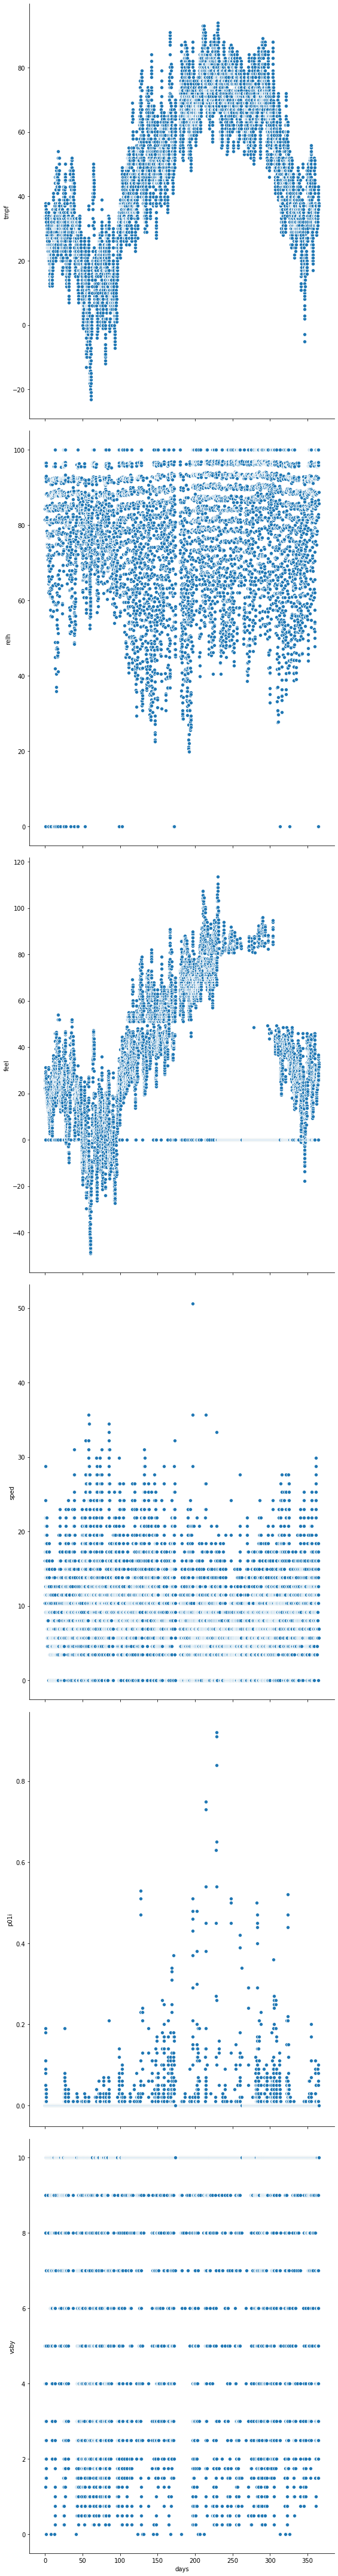

In [4]:
sns.pairplot(Ames, x_vars=['days'], y_vars=['tmpf','relh','feel','sped','p01i','vsby'], height=10, aspect=0.8)

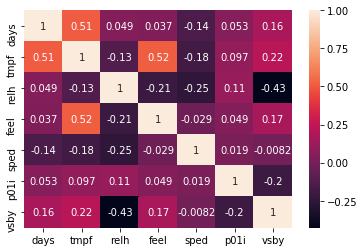

In [5]:
corr = Ames.corr(method = "pearson")
sns.heatmap(corr, annot = True)
plt.savefig('Correlation heatmap.png', tight_layout= True)

In [6]:
# Ames2=Ames.drop(['dwpf'],axis=1)

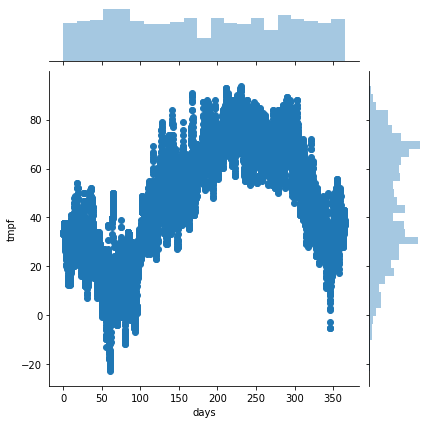

In [7]:
sns.jointplot(Ames['days'], Ames['tmpf'], kind = 'scatter')

In [8]:
from sklearn.model_selection import train_test_split
xt = Ames.iloc[:,2:7].values
xt

array([[81.37, 26.  , 10.35,  0.  ,  5.  ],
       [81.37, 25.48, 11.5 ,  0.  ,  5.  ],
       [84.36, 22.58, 16.1 ,  0.  ,  4.  ],
       ...,
       [85.69, 32.64,  6.9 ,  0.  , 10.  ],
       [88.78, 31.55,  6.9 ,  0.  , 10.  ],
       [85.64, 31.55,  6.9 ,  0.  , 10.  ]])

In [9]:
y1 = Ames.iloc[:,1].values
y1  # temperature

array([34. , 34. , 33.1, ..., 37.9, 37. , 37. ])

In [10]:
y2 = Ames.iloc[:,2].values
print (y2.shape)  # relative humidity
y3 = Ames.iloc[:,3].values
print (y3.shape)  # feel
y4 = Ames.iloc[:,4].values
print (y4.shape)  # wind speed
y5 = Ames.iloc[:,5].values
print (y5.shape)  # precipitation hourly
y6 = Ames.iloc[:,6].values
print (y6.shape)  # visibility

(11133,)
(11133,)
(11133,)
(11133,)
(11133,)


In [11]:
xt_train, xt_test, y1_train, y1_test = train_test_split(xt, y1, test_size = 0.25, random_state=1)
print (xt_train.shape, y1_train.shape)
print (xt_test.shape, y1_test.shape)

(8349, 5) (8349,)
(2784, 5) (2784,)


In [12]:
xt2 = Ames.iloc[:,3:7].values
xt2_train, xt2_test, y2_train, y2_test = train_test_split(xt2, y2, test_size = 0.25, random_state=1)
print (xt2_train.shape, y2_train.shape)
print (xt2_test.shape, y2_test.shape)

(8349, 4) (8349,)
(2784, 4) (2784,)


In [13]:
xt3 = Ames.iloc[:,4:7].values
xt3_train, xt3_test, y3_train, y3_test = train_test_split(xt3, y3, test_size = 0.25, random_state=1)
print (xt3_train.shape, y3_train.shape)
print (xt3_test.shape, y3_test.shape)

(8349, 3) (8349,)
(2784, 3) (2784,)


In [14]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xt_train = sc.fit_transform(xt_train)
xt_test = sc.transform(xt_test)
xt_test

array([[-0.73915188,  2.06771484,  0.75944891, -0.1627936 ,  0.63399582],
       [ 0.3225694 , -0.58761973,  0.57380041, -0.1627936 ,  0.63399582],
       [ 0.6786859 , -0.92603446,  0.0168549 , -0.1627936 ,  0.63399582],
       ...,
       [-0.37279175,  0.23713535,  0.2025034 , -0.1627936 ,  0.63399582],
       [ 0.10805591, -1.59623518, -0.91138761, -0.1627936 ,  0.63399582],
       [ 0.12854315,  0.19840954, -0.91138761, -0.1627936 ,  0.63399582]])

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xt2_train = sc.fit_transform(xt2_train)
xt2_test = sc.transform(xt2_test)
xt2_test

array([[ 2.06771484,  0.75944891, -0.1627936 ,  0.63399582],
       [-0.58761973,  0.57380041, -0.1627936 ,  0.63399582],
       [-0.92603446,  0.0168549 , -0.1627936 ,  0.63399582],
       ...,
       [ 0.23713535,  0.2025034 , -0.1627936 ,  0.63399582],
       [-1.59623518, -0.91138761, -0.1627936 ,  0.63399582],
       [ 0.19840954, -0.91138761, -0.1627936 ,  0.63399582]])

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xt3_train = sc.fit_transform(xt3_train)
xt3_test = sc.transform(xt3_test)
xt3_test

array([[ 0.75944891, -0.1627936 ,  0.63399582],
       [ 0.57380041, -0.1627936 ,  0.63399582],
       [ 0.0168549 , -0.1627936 ,  0.63399582],
       ...,
       [ 0.2025034 , -0.1627936 ,  0.63399582],
       [-0.91138761, -0.1627936 ,  0.63399582],
       [-0.91138761, -0.1627936 ,  0.63399582]])

In [20]:
import sklearn.datasets as skd
import sklearn.ensemble as ske
reg1 = ske.RandomForestRegressor(n_estimators= 3000, random_state= 0)
reg1.fit(xt_train, y1_train)
y1_train = np.ravel(y1_train)
reg1.fit(xt_train, y1_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=3000,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [21]:
import sklearn.datasets as skd
import sklearn.ensemble as ske
reg2 = ske.RandomForestRegressor(n_estimators= 3000, random_state= 0)
reg2.fit(xt2_train, y2_train)
y2_train = np.ravel(y2_train)
reg2.fit(xt2_train, y2_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=3000,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [22]:
import sklearn.datasets as skd
import sklearn.ensemble as ske
reg3 = ske.RandomForestRegressor(n_estimators= 3000, random_state= 0)
reg3.fit(xt3_train, y3_train)
y3_train = np.ravel(y3_train)
reg3.fit(xt3_train, y3_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=3000,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [28]:
y1_pred = reg1.predict(xt_test)

In [29]:
y2_pred = reg2.predict(xt2_test)

In [30]:
y3_pred = reg3.predict(xt3_test)

In [31]:
from sklearn.metrics import explained_variance_score, max_error, mean_absolute_error, mean_squared_error, r2_score

In [32]:
explained_variance_score(y1_test, y1_pred)
explained_variance_score(y2_test, y2_pred)
explained_variance_score(y3_test, y3_pred)

0.022000856870302177

In [33]:
max_error(y1_test, y1_pred)

48.94279999999758

In [34]:
#the importance of features on an artificial classification task
reg1.feature_importances_

array([0.04955409, 0.91969198, 0.02512467, 0.00152253, 0.00410672])

In [35]:
#sorts the actual values of the features in ascending order
#fea = reg1.feature_importances_[np.argsort(reg1.feature_importances_)][::-1]
#fea

In [36]:
#sns.distplot(fea)

Text(0, 0.5, 'Predictions')

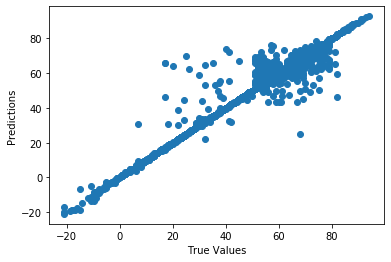

In [37]:
plt.scatter(y1_test, y1_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [51]:
y1_pred

array([ 82.0023    ,  21.90903333,  72.04376667, ...,  39.88603333,
       -13.57613333,  35.1015    ])

Text(0, 0.5, 'Predicted RH')

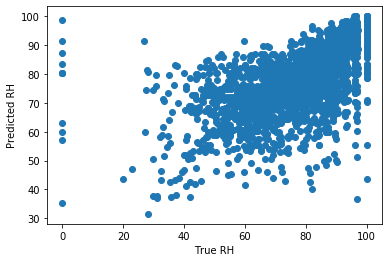

In [45]:
plt.scatter(y2_test, y2_pred)
plt.xlabel('True RH')
plt.ylabel('Predicted RH')

In [48]:
y2_pred

array([61.57934333, 75.89288605, 75.73521616, ..., 82.2061404 ,
       86.24804456, 80.42116045])

Text(0, 0.5, 'Predicted feel-like temp')

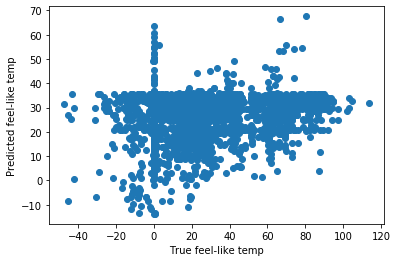

In [46]:
plt.scatter(y3_test, y3_pred)
plt.xlabel('True feel-like temp')
plt.ylabel('Predicted feel-like temp')

In [49]:
y3_pred

array([28.44714936, 33.81572467, 34.13401052, ..., 29.77570633,
       29.5609144 , 29.5609144 ])

In [42]:
score = reg1.score(xt_test, y1_test)
print (score)

0.9693469315969212


In [43]:
score = reg2.score(xt2_test, y2_test)
print (score)

0.3915411484990581


In [44]:
score = reg3.score(xt3_test, y3_test)
print (score)

0.02196959332927806


In [127]:
from sklearn import tree
reg1.estimators_[0]

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=209652396, splitter='best')

In [202]:
# Evaluate the prediction accuracy of the model
from sklearn.metrics import mean_absolute_error, median_absolute_error
print("The Explained Variance: %.2f" % reg1.score(xt_test, y1_test))
print("The Mean Absolute Error: %.2f degrees celsius" % mean_absolute_error(y1_test, y1_pred))
print("The Median Absolute Error: %.2f degrees celsius" % median_absolute_error(y1_test, y1_pred))
print("r2", r2_score(y1_test, y1_pred, multioutput = 'variance_weighted')) 

The Explained Variance: 0.97
The Mean Absolute Error: 0.00 degrees celsius
The Median Absolute Error: 0.00 degrees celsius
r2 0.9999987563822748


In [199]:
#This will output the correlation values from most negatively correlated to the most positively correlated.
Ames.corr()[['tmpf']].sort_values('tmpf')

,tmpf
sped,-0.178547
relh,-0.128216
p01i,0.097373
vsby,0.219342
days,0.509532
feel,0.515767
tmpf,1.000000
